In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')    
import scipy.stats as stats

In [2]:
data = pd.read_csv('cancer_dataset_wpbc.csv', sep = ',')

In [3]:
data.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [85]:
#Looking for missing values count
missing_val=data.isna().sum()
print(missing_val)

ID                         0
Outcome                    0
Time                       0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
Tumor Size                 0
Lymph Node Sta

In [86]:
#Imputing missing values in 'Lymph Node status ' column with mean of that column
Mean=data['Lymph Node Status'].mean()
data['Lymph Node Status'].fillna(Mean, inplace=True)
missing_val=data.isna().sum()
print(missing_val)

ID                         0
Outcome                    0
Time                       0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
Tumor Size                 0
Lymph Node Sta

In [6]:
data.shape

(198, 35)

In [7]:
column_names = data.columns
print(column_names)

Index(['ID', 'Outcome', 'Time', 'Mean Radius', 'Mean Texture',
       'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness',
       'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry',
       'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter',
       'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity',
       'SE Concave Points', 'SE Symmetry', 'SE Fractal Dimension',
       'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area',
       'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
       'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension',
       'Tumor Size', 'Lymph Node Status'],
      dtype='object')


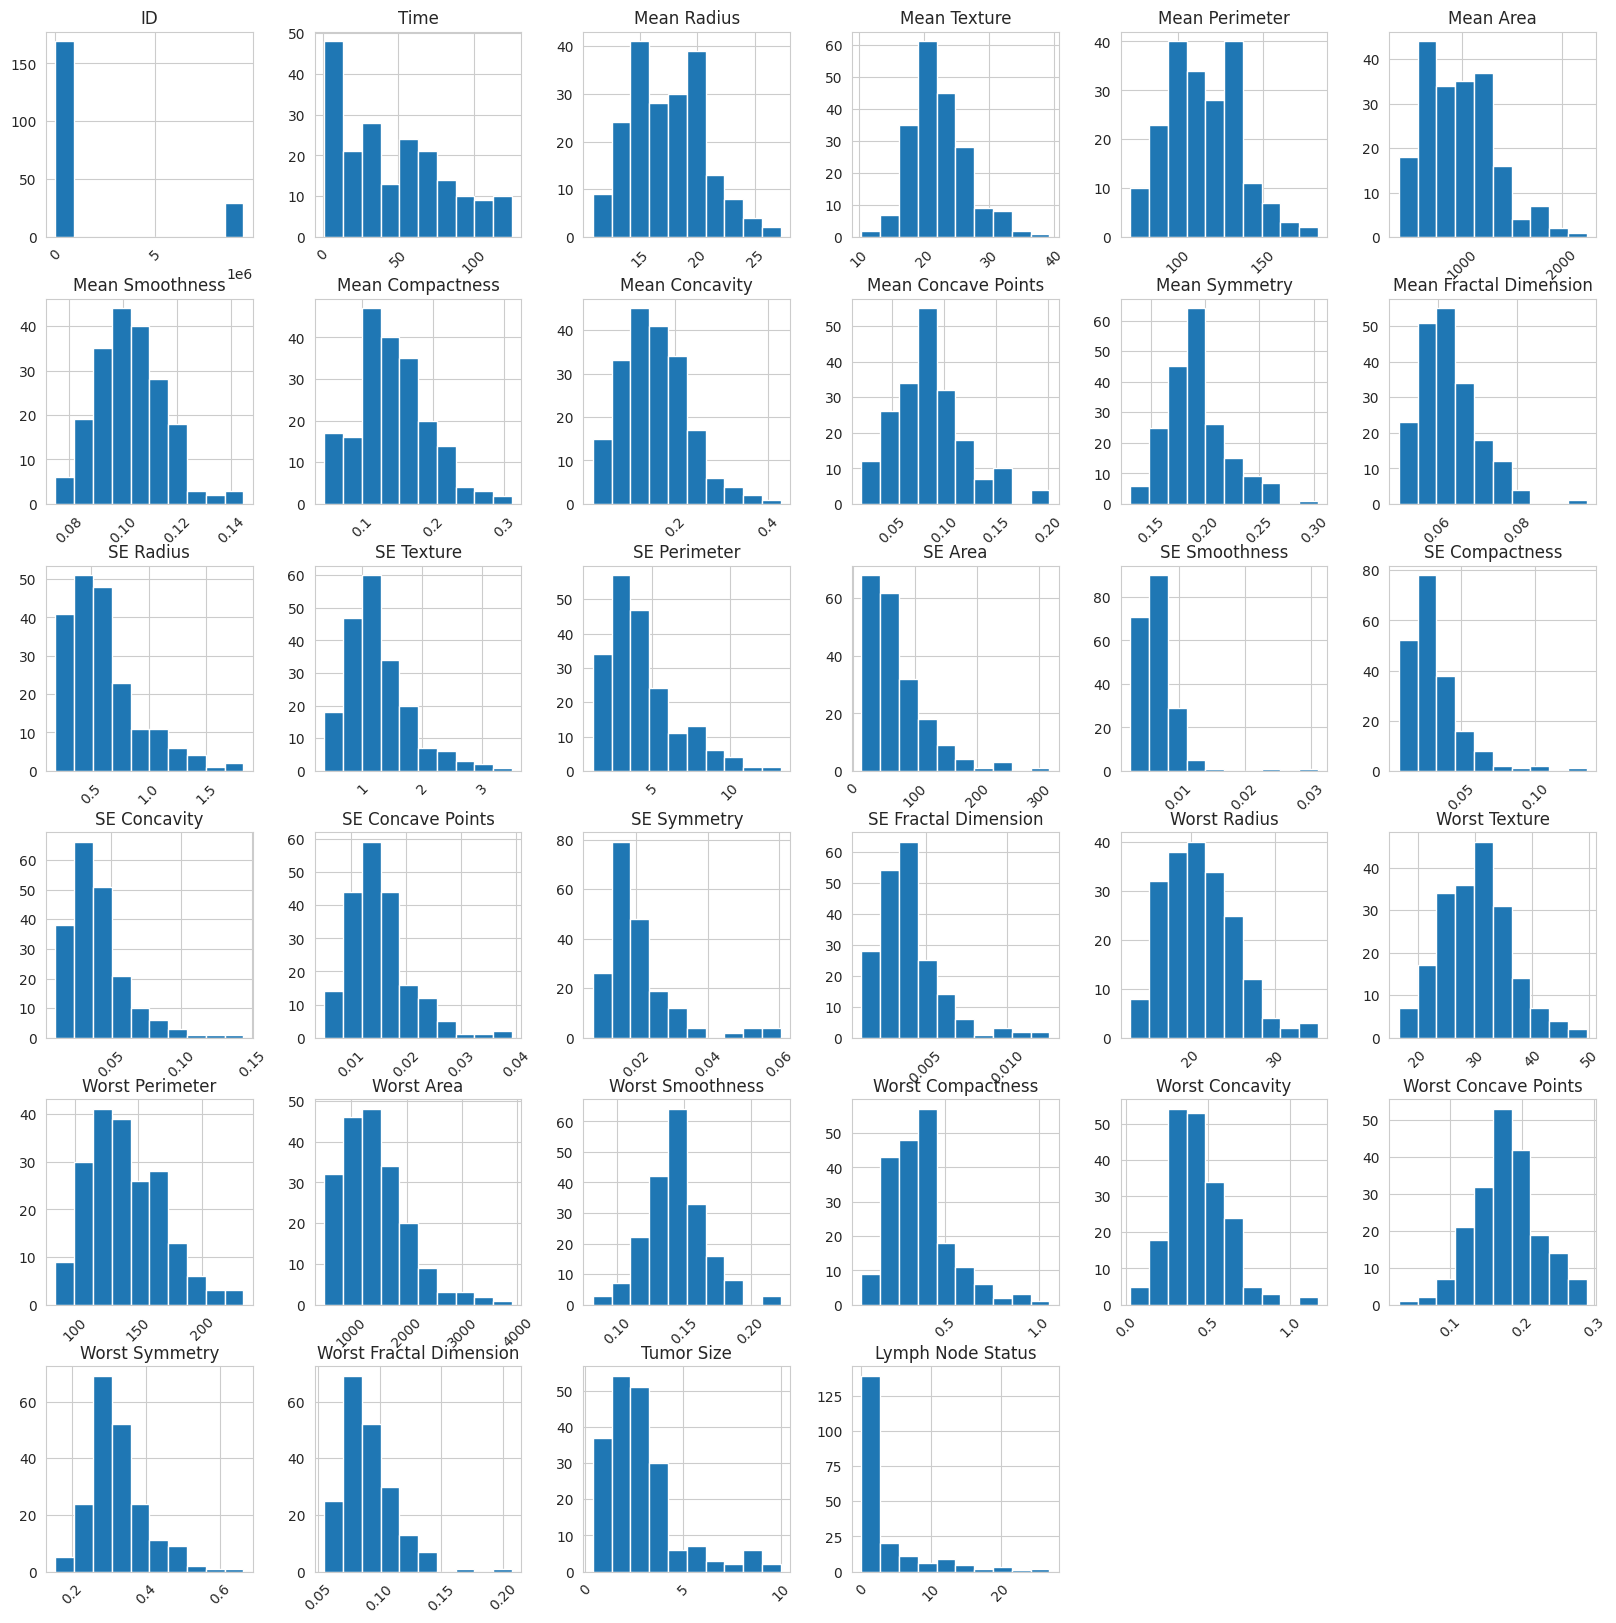

In [8]:
data.hist(figsize=(20,20), xrot=45)
plt.show()

In [6]:
data.describe()

,ID,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,194.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.479276
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [ ]:
Exploratory Data Analysis(EDA)

In [87]:
req_colums = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity' , 'Mean Concave Points']
data[req_colums].describe()


,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points
count,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776
std,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877
min,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310
25%,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670
50%,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075
75%,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925
max,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200


In [8]:
data.describe(include='object')

,Outcome
count,198
unique,2
top,N
freq,151


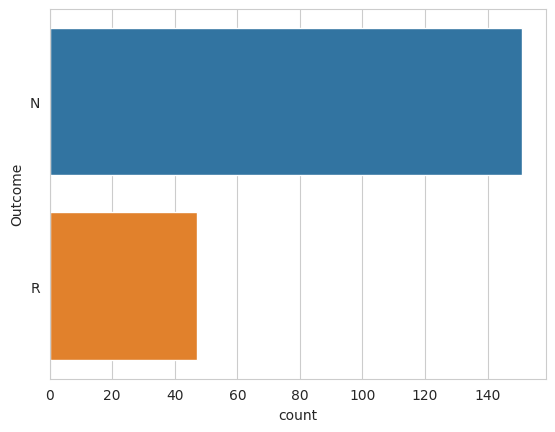

In [9]:
for col in data.select_dtypes(include='object'):
        sns.countplot(y=col, data=data)
        plt.show()

In [3]:
data['Outcome'] = data['Outcome'].replace({'N':0, 'R': 1}).astype(int)

In [89]:
data['Outcome'].describe()

count    198.000000
mean       0.237374
std        0.426552
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Outcome, dtype: float64

In [33]:
#finding correlation to find redundant features
data1 = data.drop(['Outcome', 'ID'], axis=1)

data1.corr()



,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
Time,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,...,-0.280596,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.133355,-0.127051
Mean Radius,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,...,0.915053,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.172102,0.066915
Mean Texture,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,...,0.123674,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.027073,0.042510
Mean Perimeter,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,...,0.923659,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.166489,0.068247
Mean Area,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,...,0.925335,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.174491,0.068058
Mean Smoothness,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,...,-0.064664,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,-0.084376,0.024378
Mean Compactness,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,...,0.276994,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,-0.060199,0.002752
Mean Concavity,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,...,0.514336,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,-0.010244,0.059969
Mean Concave Points,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,...,0.682749,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.050040,0.056417
Mean Symmetry,0.177311,-0.051610,-0.165166,-0.006512,-0.060785,0.540761,0.666822,0.524861,0.429968,1.000000,...,0.019708,-0.050522,0.355244,0.488231,0.458280,0.501957,0.705076,0.458548,-0.151551,-0.040798


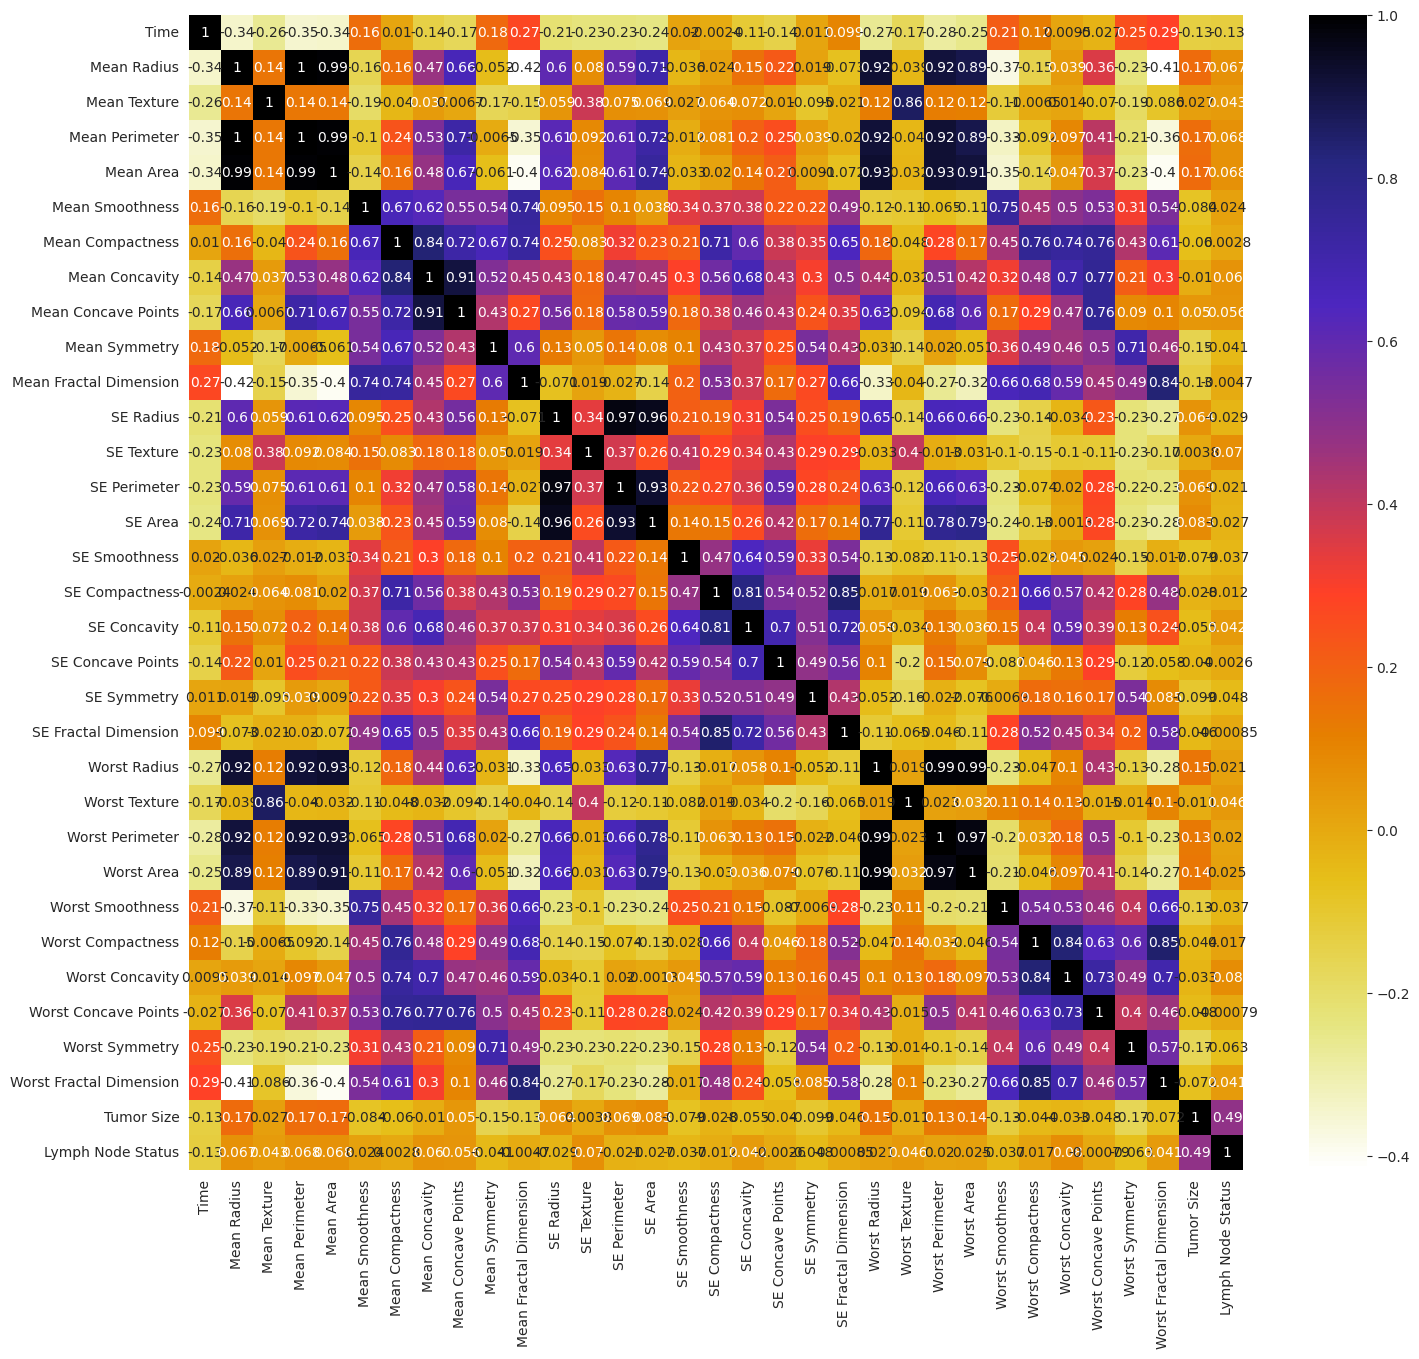

In [36]:
plt.figure(figsize=(17,15))
corrl = data1.corr()
sns.heatmap(corrl, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features = correlation(data1, 0.90)
len(set(corr_features))

8

In [46]:
corr_features

{'Mean Area',
 'Mean Concave Points',
 'Mean Perimeter',
 'SE Area',
 'SE Perimeter',
 'Worst Area',
 'Worst Perimeter',
 'Worst Radius'}

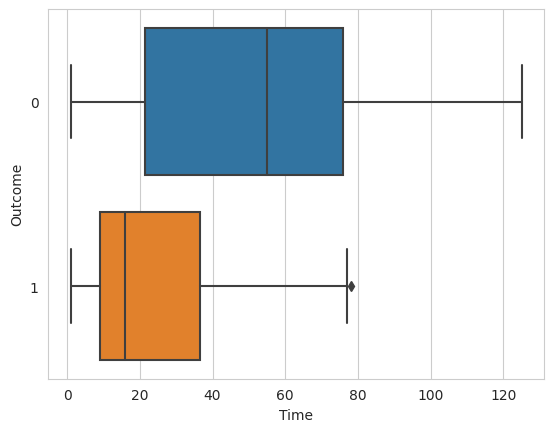

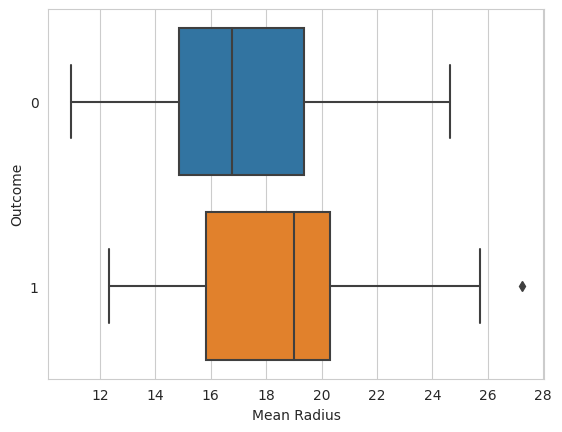

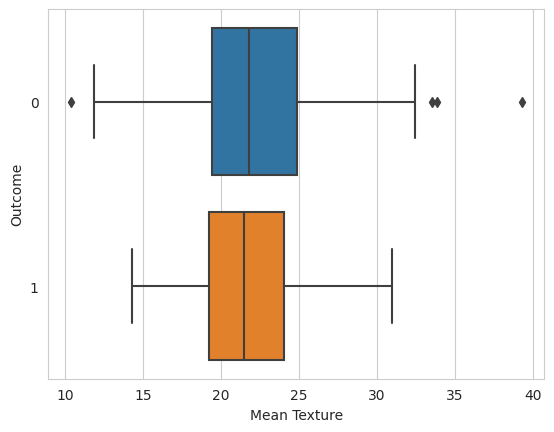

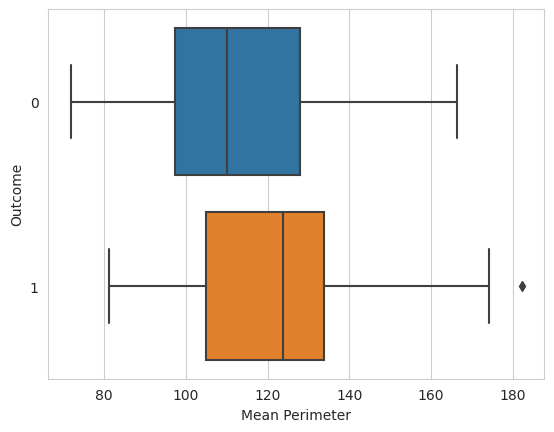

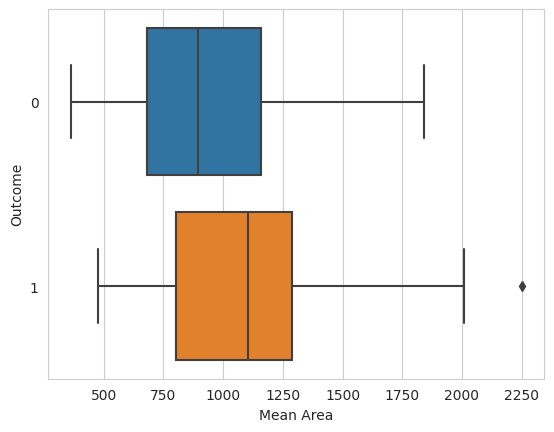

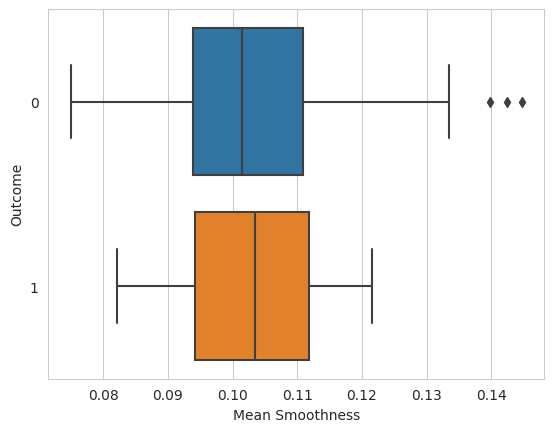

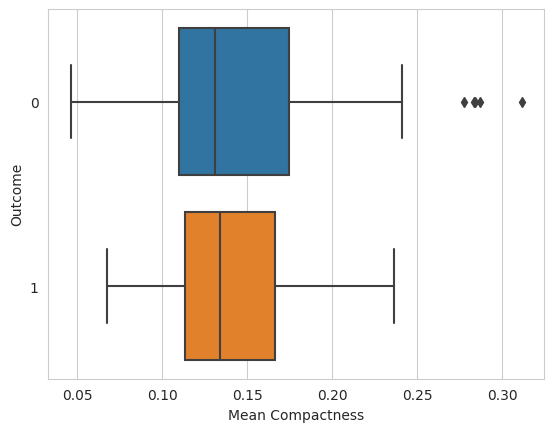

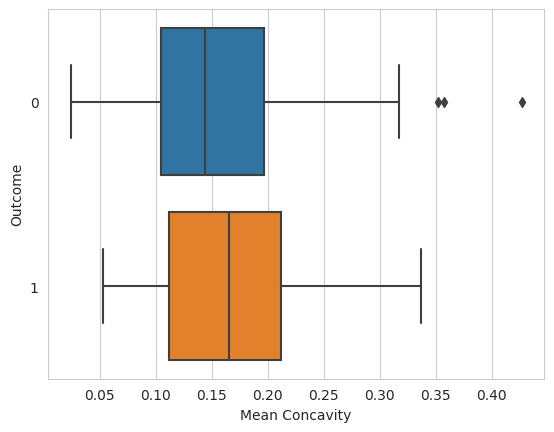

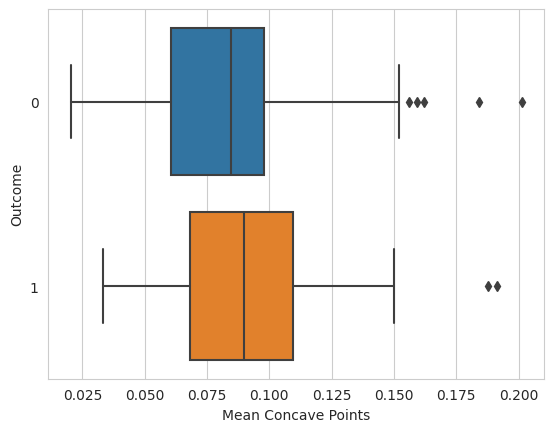

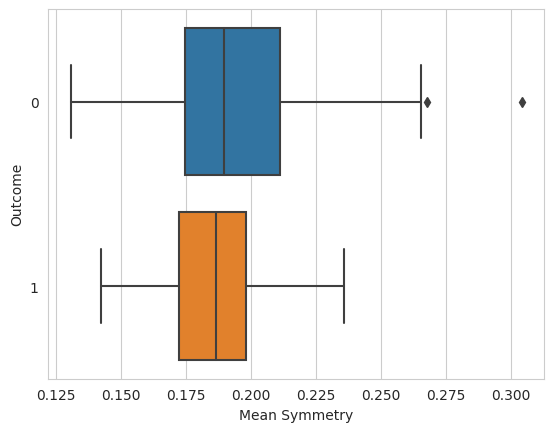

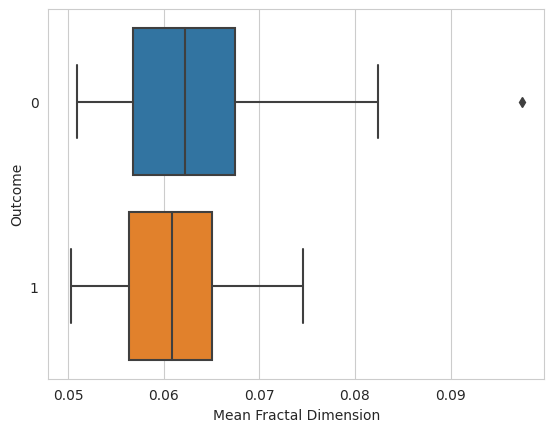

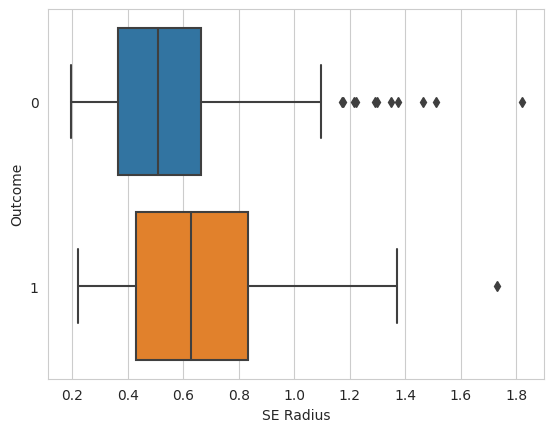

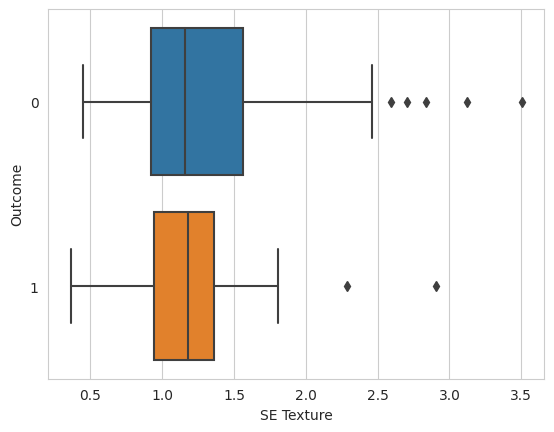

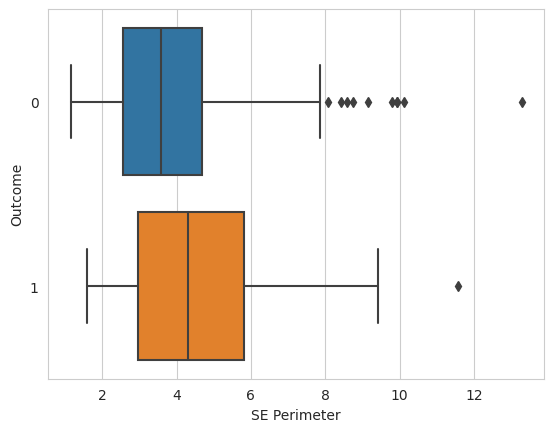

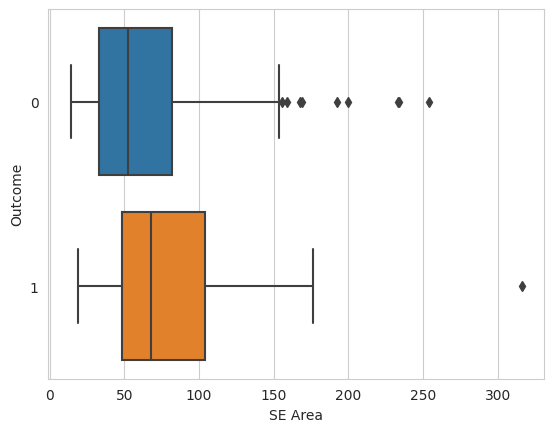

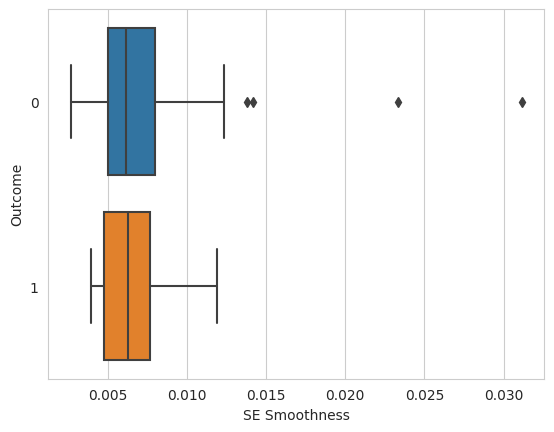

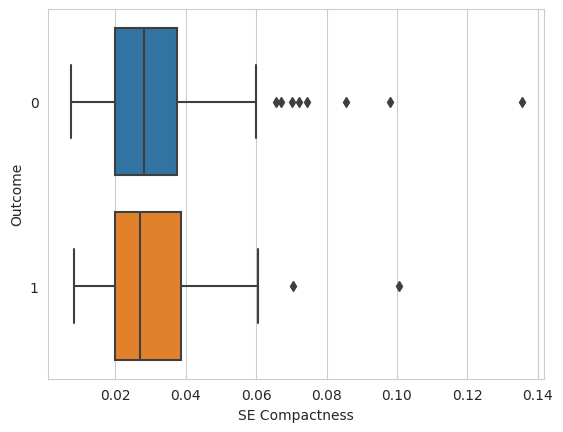

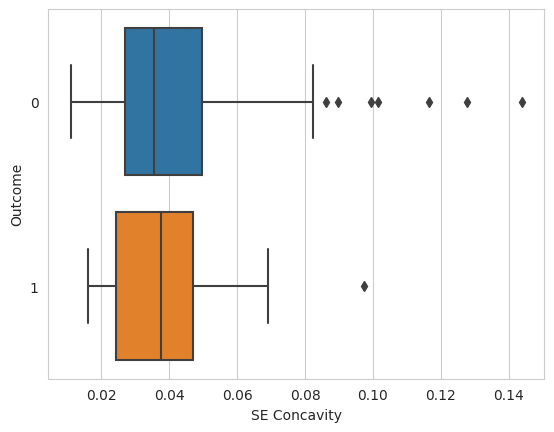

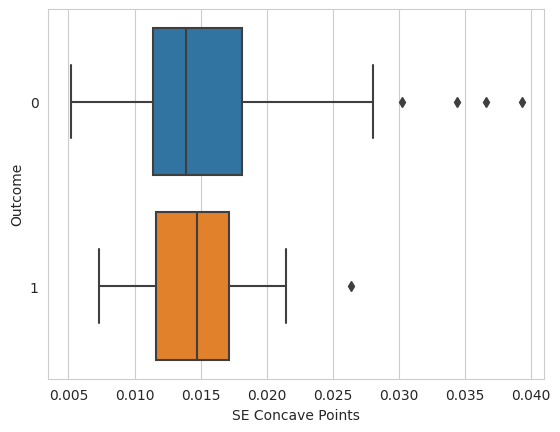

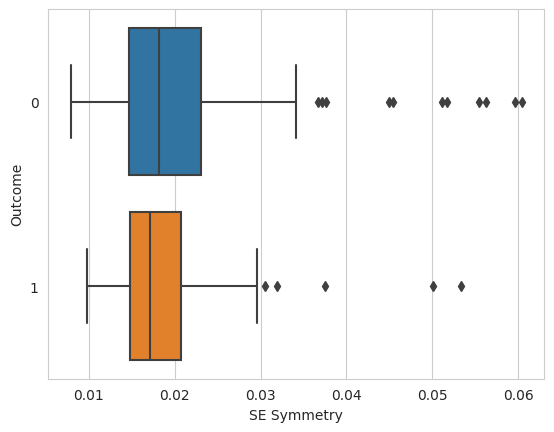

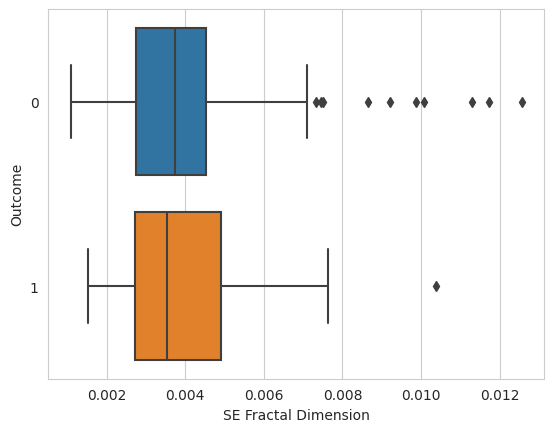

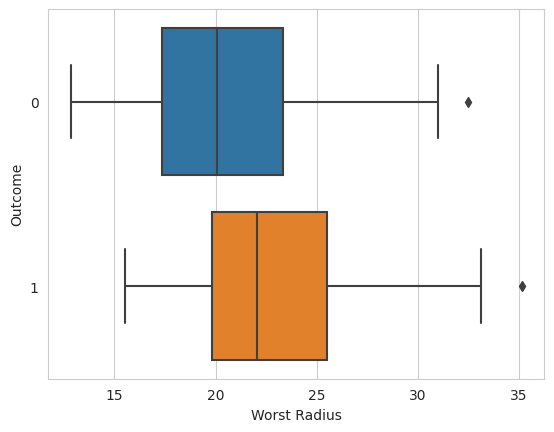

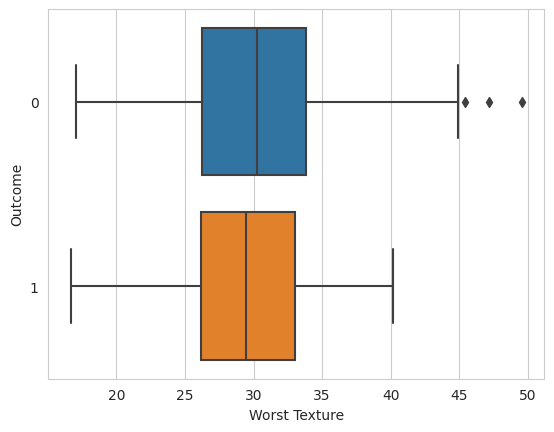

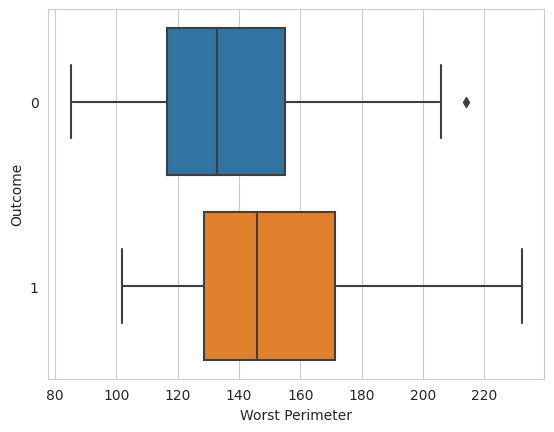

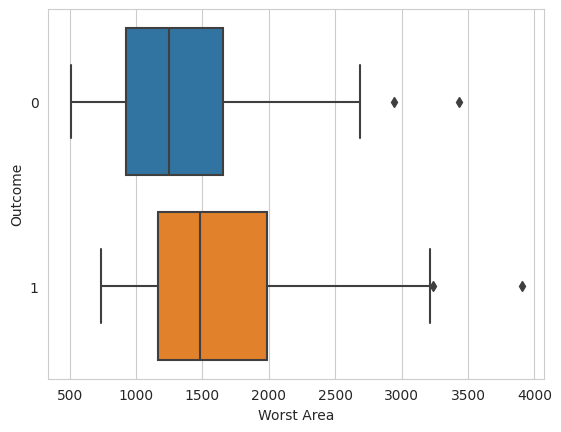

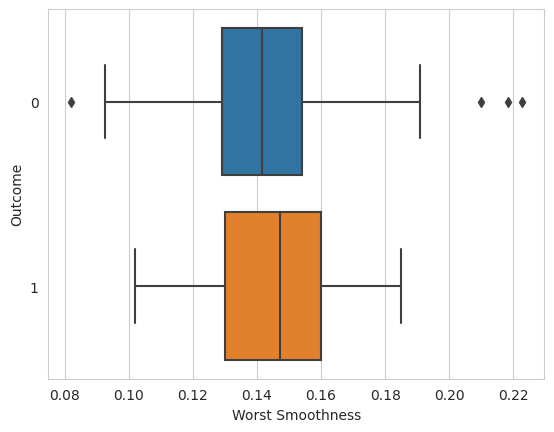

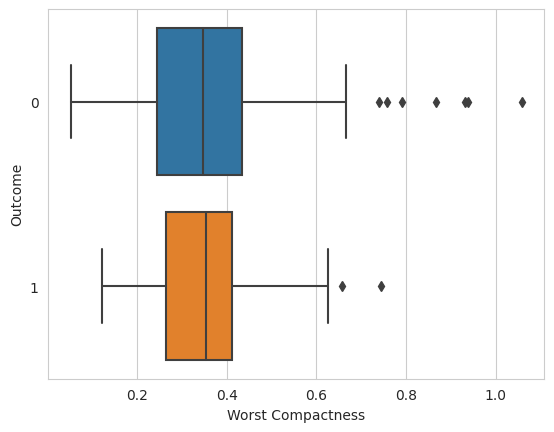

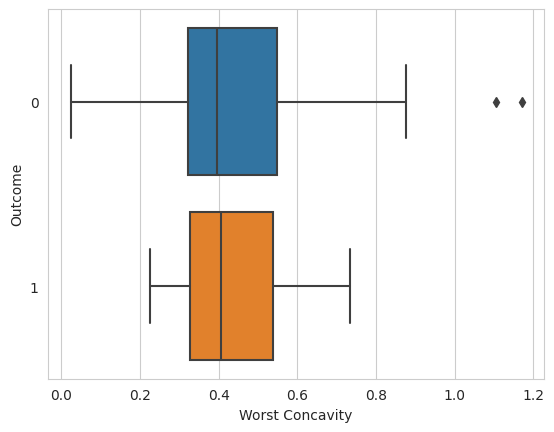

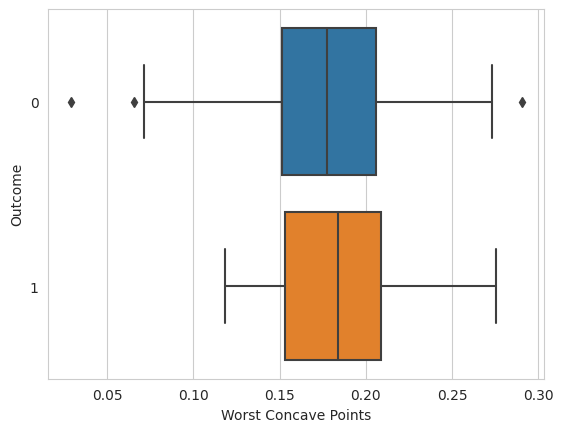

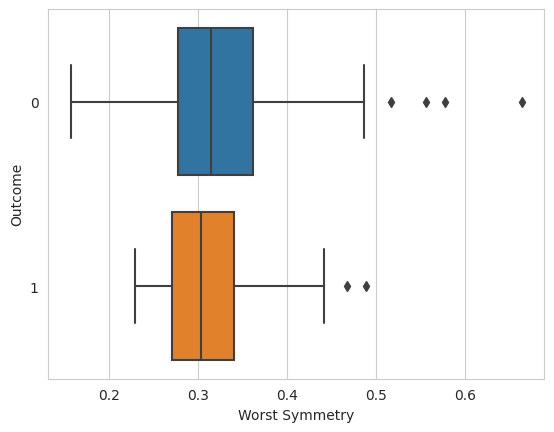

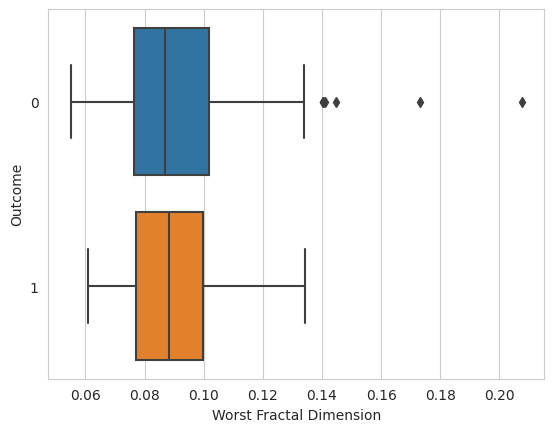

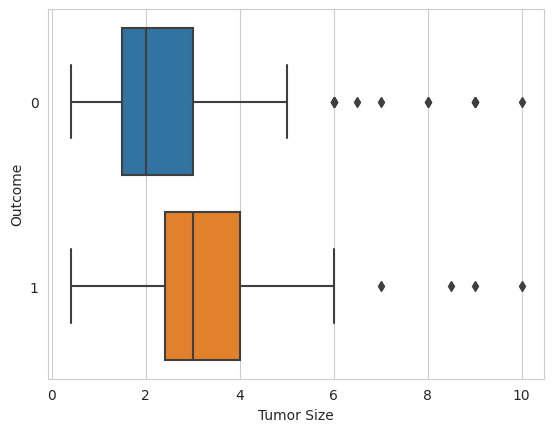

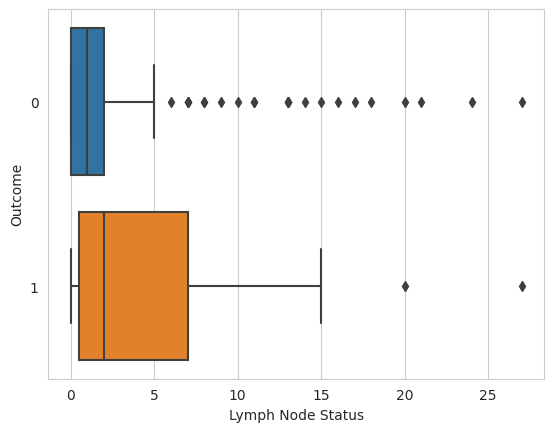

In [15]:
data_excluded = data.drop(columns=['ID'])

for column in data_excluded.columns:
    if column != 'Outcome':
            sns.boxplot(y = data_excluded['Outcome'].astype('category'), x = column, data=data_excluded)
            plt.show()

In [16]:
corr = data[['Mean Perimeter','SE Perimeter']].corr()
corr

,Mean Perimeter,SE Perimeter
Mean Perimeter,1.000000,0.609964
SE Perimeter,0.609964,1.000000


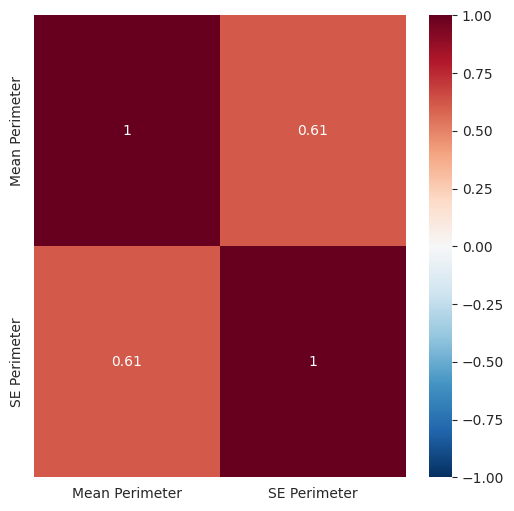

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

Has Correlation of 0.61

 Logistic Regression with One Variable 


In [48]:
#Splitting the dataset into training and testing in the ratio 80:20
one_var=data[['Mean Area','Outcome']]

split_ratio = 0.8
train_split = int(len(data) * split_ratio)
one_var= one_var.sample(frac=1, random_state=42)
train_data = one_var.iloc[:train_split, :]
test_data = one_var.iloc[train_split:, :]


X=one_var['Mean Area']
Y=one_var['Outcome']


X = X.to_numpy()
X = X.reshape(-1, 1)
 

X_train = train_data['Mean Area'].values
Y_train = train_data['Outcome'].values

X_train = X_train.reshape(-1, 1)


X_test = test_data['Mean Area'].values
Y_test = test_data['Outcome'].values


X_test = X_test.reshape(-1, 1)


In [49]:

#Logistic Regression class
class LogisticRegression:
    
    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.Y_prob = None  
        self.Y_pred = None  
    
    def sigmoid (self,x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
        
    

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        pred = np.dot(X, self.weights) + self.bias
        self.Y_prob = self.sigmoid(pred)
        self.Y_pred = [1 if y > 0.5 else 0 for y in self.Y_prob]
        return self.Y_pred

    def get_probabilities(self):
        return self.Y_prob
   


         

In [116]:
model = LogisticRegression(lr=0.05, n_iters=1000)
model = LogisticRegression(X.shape[1])


model.fit(X_train, Y_train)



Y_pred = model.predict(X_test)


def accuracy(Y_pred, Y_test):
    return np.sum(Y_pred==Y_test)/len(Y_test)

acc = accuracy(Y_pred, Y_test)
print(acc)




0.15


In [8]:
#Calculating evaluation metrics

def confusion_matrix(Y_test, Y_pred):
    Y_test = np.array(Y_test)
    Y_pred = np.array(Y_pred)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))
    
    # Calculate Recall and Precision
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return np.array([[true_negative, false_positive], [false_negative, true_positive]]), f1_score, recall,precision

conf_mat, f1, rec,pre = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")








Confusion Matrix:
[[ 0 34]
 [ 0  6]]
Recall: 1.0
Precision: 0.15
F1 score: 0.2608695652173913


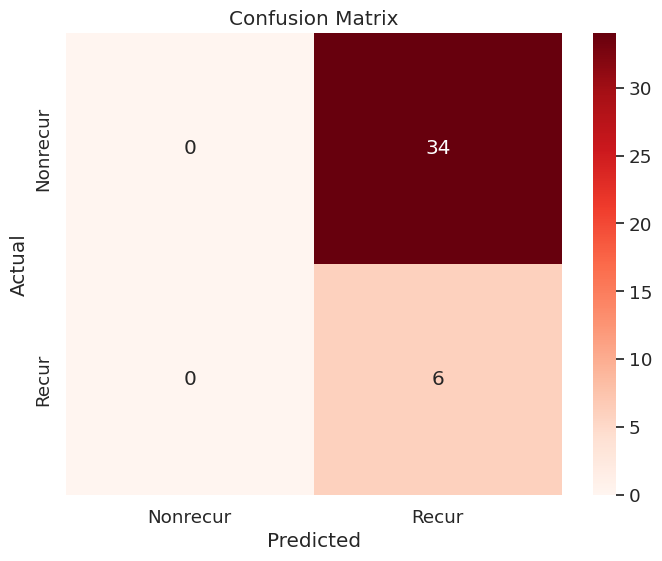

Recall: 1.0
Precision: 0.15
F1 score: 0.2608695652173913


In [9]:
class_names = ['Nonrecur', 'Recur']

sns.set(font_scale=1.2)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")


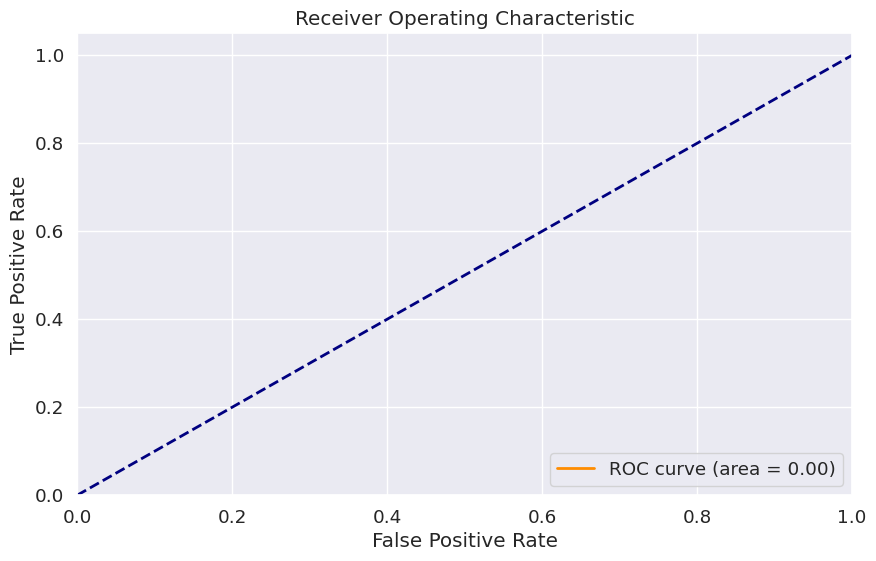

ROC AUC Score: 0.0


In [10]:
# Calculating ROC-AUC Score
Y_prob = model.get_probabilities()
Y_pred = model.predict(X_test)

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

roc_points = []

for threshold in thresholds:
    Y_pred = (Y_prob >= threshold).astype(int)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)

    roc_points.append((fpr, tpr))


roc_points.sort(key=lambda x: x[0])


roc_auc = 0
for i in range(1, len(roc_points)):
    prev_fpr, prev_tpr = roc_points[i - 1]
    curr_fpr, curr_tpr = roc_points[i]
    roc_auc += (curr_fpr - prev_fpr) * (prev_tpr + curr_tpr) / 2

# Extract FPR and TPR for plotting
fpr = [point[0] for point in roc_points]
tpr = [point[1] for point in roc_points]

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)


 Logistic Regression with Multiple Variables 



In [33]:

#Splitting the dataset into training and testing in the ratio 80:20
twelve_var=data[['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Fractal Dimension', 'SE Perimeter', 'SE Texture', 'SE Area','Outcome']]
split_ratio = 0.8
train_split = int(len(data) * split_ratio)
twelve_var= twelve_var.sample(frac=1, random_state=42)
train_data = twelve_var.iloc[:train_split, :]
test_data = twelve_var.iloc[train_split:, :]


X=twelve_var.drop('Outcome',axis=1)
Y=twelve_var['Outcome']

# Reshapig X to match the expected input shape for the model
# X = X.to_numpy()
# X = X.reshape(-1, 1)
 

X_train = train_data.drop('Outcome' ,axis=1).values
Y_train = train_data['Outcome'].values


# X_train = X_train.reshape(-1, 1)

X_test = test_data.drop('Outcome' ,axis=1).values
Y_test = test_data['Outcome'].values



# X_test = X_test.reshape(-1, 1)


In [89]:
X_train.shape

(158, 12)

In [124]:
model_2 = LogisticRegression(lr=0.05,n_iters=1000)

model_2.fit(X_train, Y_train)


Y_pred = model_2.predict(X_test)


def accuracy(Y_pred, Y_test):
    return np.sum(Y_pred==Y_test)/len(Y_test)

acc = accuracy(Y_pred, Y_test)
print(acc)

0.15


In [13]:

def confusion_matrix(Y_test, Y_pred):
    Y_test = np.array(Y_test)
    Y_pred = np.array(Y_pred)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))
    
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return np.array([[true_negative, false_positive], [false_negative, true_positive]]), f1_score, recall,precision

conf_mat, f1, rec ,pre = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")





Confusion Matrix:
[[17 17]
 [ 1  5]]
Recall: 0.8333333333333334
Precision: 0.22727272727272727
F1 score: 0.35714285714285715


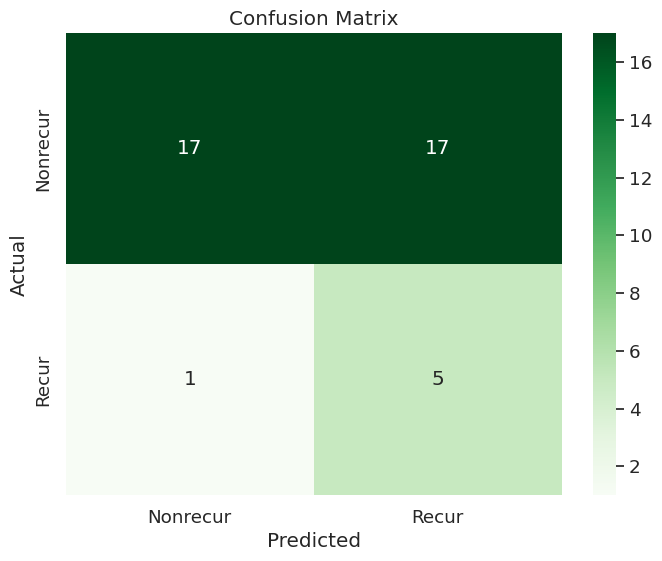

Recall: 0.8333333333333334
Precision: 0.22727272727272727
F1 score: 0.35714285714285715


In [14]:
class_names = ['Nonrecur', 'Recur']


sns.set(font_scale=1.2)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")

In [15]:
# Calculating ROC-AUC Score
Y_prob = model_2.get_probabilities()
Y_pred = model_2.predict(X_test)

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

roc_points = []

for threshold in thresholds:
    Y_pred = (Y_prob >= threshold).astype(int)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)

    roc_points.append((fpr, tpr))

roc_points.sort(key=lambda x: x[0])


roc_auc = 0
for i in range(1, len(roc_points)):
    prev_fpr, prev_tpr = roc_points[i - 1]
    curr_fpr, curr_tpr = roc_points[i]
    roc_auc += (curr_fpr - prev_fpr) * (prev_tpr + curr_tpr) / 2


fpr = [point[0] for point in roc_points]
tpr = [point[1] for point in roc_points]



print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.45833333333333337


Designing a Logistic Regression model to predict breast cancer recurrence (Outcome) using forward
selection to select the most significant variables in the dataset as input features.

In [167]:

#Splitting the dataset into training and testing in the ratio 80:20
best_feat=data[['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Fractal Dimension', 'SE Perimeter', 'SE Texture', 'SE Area','Outcome']]
split_ratio = 0.8
train_split = int(len(data) * split_ratio)
twelve_var= best_feat.sample(frac=1, random_state=42)
train_data = best_feat.iloc[:train_split, :]
test_data = best_feat.iloc[train_split:, :]


X=best_feat.drop('Outcome',axis=1)
Y=best_feat['Outcome']


X = X.to_numpy()
X = X.reshape(-1, 1)
 

X_train = train_data.drop('Outcome' ,axis=1).values
Y_train = train_data['Outcome'].values


X_train = X_train.reshape(-1, 1)

X_test = test_data.drop('Outcome' ,axis=1).values
Y_test = test_data['Outcome'].values


In [168]:


input_features = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Fractal Dimension', 'SE Perimeter', 'SE Texture', 'SE Area']


num_samples = len(data)
train_size = int(0.8 * num_samples)


shuffled_indices = np.random.permutation(num_samples)

# Split the data into training and testing sets
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

X_train = data[input_features].iloc[train_indices].values
y_train = data['Outcome'].iloc[train_indices].values

X_test = data[input_features].iloc[test_indices].values
y_test = data['Outcome'].iloc[test_indices].values


class LogisticRegression:
    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        pred = np.dot(X, self.weights) + self.bias
        Y_prob = self.sigmoid(pred)
        Y_pred = np.where(Y_prob > 0.5, 1, 0)
        return Y_prob, Y_pred

def confusion_matrix(Y_test, Y_pred):
    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))

    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    confusion_matrix = np.array([[true_negative, false_positive], [false_negative, true_positive]])

    return f1, precision, recall, confusion_matrix










In [169]:

input_features = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Fractal Dimension', 'SE Perimeter', 'SE Texture', 'SE Area']

num_samples = len(data)
train_size = int(0.8 * num_samples)

shuffled_indices = np.random.permutation(num_samples)

train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

X_train = data[input_features].iloc[train_indices].values
y_train = data['Outcome'].iloc[train_indices].values

X_test = data[input_features].iloc[test_indices].values
y_test = data['Outcome'].iloc[test_indices].values

selected_features = []
best_f1_score = 0
best_recall = 0
best_precision = 0
best_confusion_matrix = None
best_roc_auc = 0

while len(selected_features) < len(input_features):
    best_feature = None
    best_f1_with_feature = best_f1_score

    for feature in input_features:
        if feature not in selected_features:

            features_to_use = selected_features + [feature]


            X_train_subset = X_train[:, [input_features.index(f) for f in features_to_use]]
            X_test_subset = X_test[:, [input_features.index(f) for f in features_to_use]]

            logistic_regression = LogisticRegression(lr=0.05, n_iters=1000)
            logistic_regression.fit(X_train_subset, y_train)

            Y_prob, Y_pred = logistic_regression.predict(X_test_subset)
            f1, precision, recall, cm = confusion_matrix(y_test, Y_pred)

            if f1 > best_f1_with_feature:
                best_f1_with_feature = f1
                best_feature = feature
                best_recall = recall
                best_precision = precision
                best_confusion_matrix = cm

    if best_feature:
        selected_features.append(best_feature)
        best_f1_score = best_f1_with_feature
    else:
        break


    X_test_subset = X_test[:, [input_features.index(f) for f in selected_features]]
    Y_prob, Y_pred = logistic_regression.predict(X_test_subset)

thresholds = np.arange(0, 1.01, 0.01)
tpr = []
fpr = []
for threshold in thresholds:
    Y_pred_threshold = (Y_prob >= threshold).astype(int)

    true_positive = np.sum((y_test == 1) & (Y_pred_threshold == 1))
    false_positive = np.sum((y_test == 0) & (Y_pred_threshold == 1))
    true_negative = np.sum((y_test == 0) & (Y_pred_threshold == 0))
    false_negative = np.sum((y_test == 1) & (Y_pred_threshold == 0))

    if (false_positive + true_negative) > 0:
        fpr.append(false_positive / (false_positive + true_negative))
    else:
        fpr.append(0.0)

    tpr.append(true_positive / (true_positive + false_negative))


roc_auc = np.trapz(tpr, fpr)


print(f"The best features are: {selected_features}")
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f" Recall: {best_recall:.4f}")
print(f" Precision: {best_precision:.4f}")
print(" Confusion Matrix:")
print(best_confusion_matrix)
print(f" ROC-AUC Score: {best_roc_auc:.4f}")


The best features are: ['Mean Radius', 'SE Perimeter']
Best F1 Score: 0.5333
 Recall: 0.6667
 Precision: 0.4444
 Confusion Matrix:
[[29  5]
 [ 2  4]]
 ROC-AUC Score: 0.0000



Regularization and Feature Scaling



In [38]:


one_var = data[['Mean Radius', 'SE Perimeter', 'Outcome']]

split_ratio = 0.8
train_split = int(len(data) * split_ratio)

# Shuffle the dataset
one_var = one_var.sample(frac=1, random_state=42)

# Split the data
train_data = one_var.iloc[:train_split, :]
test_data = one_var.iloc[train_split:, :]

# Extract features and labels
X_train = train_data[['Mean Radius', 'SE Perimeter']].values
Y_train = train_data['Outcome'].values

X_test = test_data[['Mean Radius', 'SE Perimeter']].values
Y_test = test_data['Outcome'].values

# Reshape the feature vectors
X_train = X_train.reshape(-1, 2)  # Use (n_samples, n_features) shape
X_test = X_test.reshape(-1, 2)    # Use (n_samples, n_features) shape



In [39]:


class LogisticRegressionWithRegularization:
    
    def __init__(self, lr=0.05, n_iters=1000, reg_lambda=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = None
        self.Y_prob = None
        self.Y_pred = None

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + (self.reg_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        pred = np.dot(X, self.weights) + self.bias
        self.Y_prob = self.sigmoid(pred)
        self.Y_pred = [1 if y > 0.5 else 0 for y in self.Y_prob]
        return self.Y_pred

    def get_probabilities(self):
        return self.Y_prob



In [40]:

model_3 = LogisticRegressionWithRegularization(lr=0.05, n_iters=1000)



model_3.fit(X_train, Y_train)


Y_pred = model_3.predict(X_test)


def accuracy(Y_pred, Y_test):
    return np.sum(Y_pred==Y_test)/len(Y_test)

acc = accuracy(Y_pred, Y_test)
print(acc)

0.7


In [41]:
def confusion_matrix(Y_test, Y_pred):
    Y_test = np.array(Y_test)
    Y_pred = np.array(Y_pred)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))
    
    # Calculate Recall and Precision
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return np.array([[true_negative, false_positive], [false_negative, true_positive]]), f1_score, recall,precision

conf_mat, f1, rec ,pre = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")



Confusion Matrix:
[[28  6]
 [ 6  0]]
Recall: 0.0
Precision: 0.0
F1 score: 0


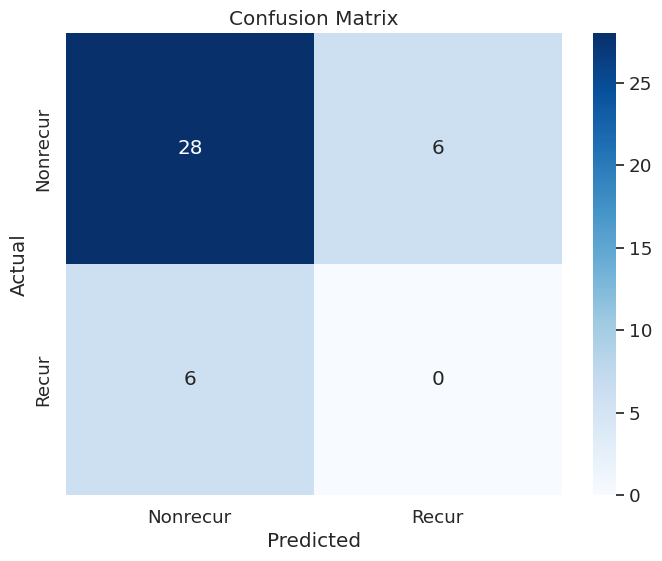

Recall: 0.0
Precision: 0.0
F1 score: 0


In [44]:
class_names = ['Nonrecur', 'Recur']

sns.set(font_scale=1.2)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")


Feature Scaling to see if the model improves

In [32]:

one_var = data[['Mean Radius', 'SE Perimeter', 'Outcome']]

split_ratio = 0.8
train_split = int(len(data) * split_ratio)


one_var = one_var.sample(frac=1, random_state=42)

train_data = one_var.iloc[:train_split, :]
test_data = one_var.iloc[train_split:, :]


X_train = train_data[['Mean Radius', 'SE Perimeter']].values
Y_train = train_data['Outcome'].values

X_test = test_data[['Mean Radius', 'SE Perimeter']].values
Y_test = test_data['Outcome'].values


X_train = X_train.reshape(-1, 2)  
X_test = X_test.reshape(-1, 2)   


In [35]:


class LogisticRegressionWithFeatureScaling:
    
    def __init__(self, lr=0.05, n_iters=1000, scaling_method=None):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.Y_prob = None 
        self.Y_pred = None  
        self.scaling_method = scaling_method

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def standardize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        standardized_X = (X - mean) / std
        return standardized_X

    def min_max_scale(self, X):
        min_val = np.min(X, axis=0)
        max_val = np.max(X, axis=0)
        scaled_X = (X - min_val) / (max_val - min_val)
        return scaled_X

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Applying the selected feature scaling method
        if self.scaling_method == "standardize":
            X = self.standardize(X)
        elif self.scaling_method == "min_max_scale":
            X = self.min_max_scale(X)

        for _ in range(self.n_iters):
            pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        # Applying the selected feature scaling method
        if self.scaling_method == "standardize":
            X = self.standardize(X)
        elif self.scaling_method == "min_max_scale":
            X = self.min_max_scale(X)

        pred = np.dot(X, self.weights) + self.bias
        self.Y_prob = self.sigmoid(pred)
        self.Y_pred = [1 if y > 0.5 else 0 for y in self.Y_prob]
        return self.Y_pred

    def get_probabilities(self):
        return self.Y_prob




In [36]:
model = LogisticRegressionWithFeatureScaling(lr=0.05, n_iters=1000, scaling_method="standardize")
# model = LogisticRegressionWithFeatureScaling(lr=0.05, n_iters=1000, scaling_method=None)
# model = LogisticRegressionWithFeatureScaling(lr=0.05, n_iters=1000, scaling_method="standardize")




model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)


def accuracy(Y_pred, Y_test):
    return np.sum(Y_pred==Y_test)/len(Y_test)

acc = accuracy(Y_pred, Y_test)
print(acc)

0.8


In [37]:
def confusion_matrix(Y_test, Y_pred):
    Y_test = np.array(Y_test)
    Y_pred = np.array(Y_pred)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))
    
    # Calculate Recall and Precision
    if true_positive + false_positive == 0:
        precision = 0.0
    else:
        precision = true_positive / (true_positive + false_positive)

    if true_positive + false_negative == 0:
        recall = 0.0
    else:
        recall = true_positive / (true_positive + false_negative)
    
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return np.array([[true_negative, false_positive], [false_negative, true_positive]]), f1_score, recall


conf_mat, f1, rec = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")

Confusion Matrix:
[[32  2]
 [ 6  0]]
Recall: 0.0
Precision: 0
F1 score: 0


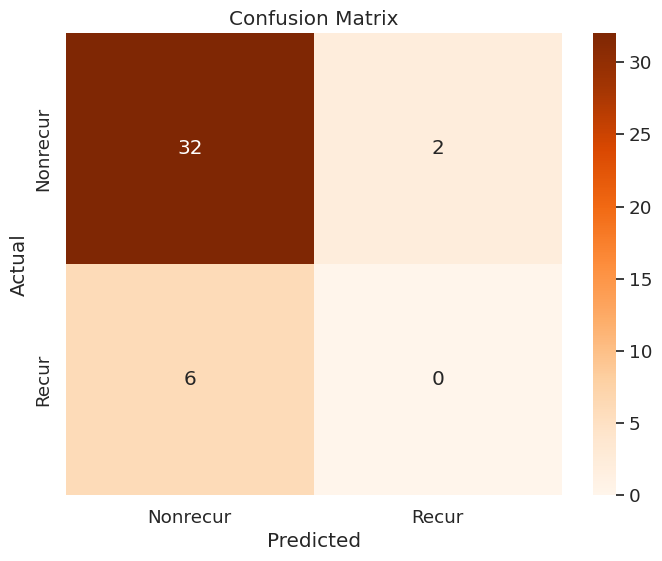

Recall: 0.0
Precision: 0.0
F1 score: 0


In [16]:
class_names = ['Nonrecur', 'Recur']


sns.set(font_scale=1.2)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")


In [17]:
one_var = data[['Mean Radius', 'SE Perimeter', 'Outcome']]

split_ratio = 0.8
train_split = int(len(data) * split_ratio)


one_var = one_var.sample(frac=1, random_state=42)


train_data = one_var.iloc[:train_split, :]
test_data = one_var.iloc[train_split:, :]

X_train = train_data[['Mean Radius', 'SE Perimeter']].values
Y_train = train_data['Outcome'].values

X_test = test_data[['Mean Radius', 'SE Perimeter']].values
Y_test = test_data['Outcome'].values


X_train = X_train.reshape(-1, 2)  
X_test = X_test.reshape(-1, 2)  

In [45]:
class LogisticRegressionWithMSE:
    
    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.Y_prob = None
        self.Y_pred = None
    
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(pred)

            mse_loss = (1 / (2 * n_samples)) * np.sum((y - predictions) ** 2)

           
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

        
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        pred = np.dot(X, self.weights) + self.bias
        self.Y_prob = self.sigmoid(pred)
        self.Y_pred = [1 if y > 0.5 else 0 for y in self.Y_prob]
        return self.Y_pred

    def get_probabilities(self):
        return self.Y_prob


In [46]:
model_5 = LogisticRegressionWithMSE(lr=0.05,n_iters=1000)

model_5.fit(X_train, Y_train)


Y_pred = model_5.predict(X_test)


def accuracy(Y_pred, Y_test):
    return np.sum(Y_pred==Y_test)/len(Y_test)

acc = accuracy(Y_pred, Y_test)
print(acc)

0.85


In [47]:
def confusion_matrix(Y_test, Y_pred):
    Y_test = np.array(Y_test)
    Y_pred = np.array(Y_pred)

    true_positive = np.sum((Y_test == 1) & (Y_pred == 1))
    true_negative = np.sum((Y_test == 0) & (Y_pred == 0))
    false_positive = np.sum((Y_test == 0) & (Y_pred == 1))
    false_negative = np.sum((Y_test == 1) & (Y_pred == 0))
    

    if true_positive + false_positive == 0:
        precision = 0.0
    else:
        precision = true_positive / (true_positive + false_positive)

    if true_positive + false_negative == 0:
        recall = 0.0
    else:
        recall = true_positive / (true_positive + false_negative)
    
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return np.array([[true_negative, false_positive], [false_negative, true_positive]]), f1_score, recall


conf_mat, f1, rec = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(f"Recall: {rec}")
print(f"F1 score: {f1}")

Confusion Matrix:
[[34  0]
 [ 6  0]]
Recall: 0.0
F1 score: 0


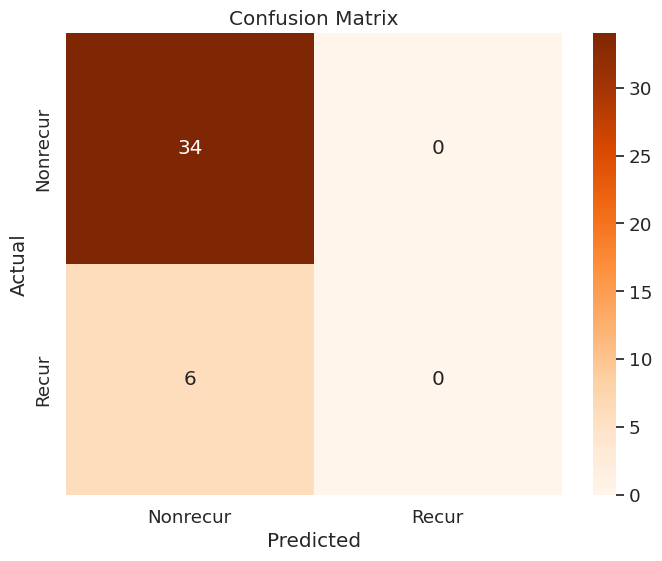

Recall: 0.0
Precision: 0.0
F1 score: 0


In [21]:
class_names = ['Nonrecur', 'Recur']

sns.set(font_scale=1.2)  
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
print(f"Recall: {rec}")
print(f"Precision: {pre}")
print(f"F1 score: {f1}")